# Differential Gene Expression and Pathway Analysis in Kidney Transplant Biopsies: Identifying Biomarkers for Chronic Allograft Dysfunction and Rejection

## Background:

Kidney transplantation is a pivotal treatment for end-stage renal disease, offering recipients an improved quality of life and extended survival. Despite advancements in transplant medicine, chronic allograft dysfunction (CAD) remains a major barrier to long-term transplant success, frequently leading to graft failure and the need for re-transplantation. The ability to predict and understand the molecular mechanisms of CAD and acute rejection through biomarkers could revolutionize personalized treatment plans and enhance graft longevity.

This project aims to explore the molecular basis of kidney transplant rejection by directly comparing gene expression profiles from pre- and post-transplant kidney biopsies. By employing differential expression analysis and pathway enrichment, the study seeks to identify key biomarkers that can predict the outcome of kidney transplants, potentially leading to earlier interventions and tailored therapeutic strategies to prevent or mitigate CAD.

## **Dataset Overview:**
### **GSE261240 (Pre-Transplant Biopsies):**

**Source**: Gene Expression Omnibus (GEO)

**Platform**: Illumina NovaSeq 6000 (Homo sapiens)

**Sample Count**: 136 pre-transplant kidney biopsies.

**Objective**: The goal with these pre-transplant biopsies is to identify potential biomarkers that predict the early functional status of the kidney graft, helping to foresee complications before they manifest clinically.

### **GSE261892 (Post-Transplant Biopsies):**

**Source**: Gene Expression Omnibus (GEO)

**Platform**: Illumina NovaSeq 6000 (Homo sapiens)

**Sample Count**: 123 samples from biopsies performed 3 months post-transplant.

**Objective**: This dataset is utilized to examine the gene expression profiles of kidney biopsies after transplantation to identify biomarkers for acute allograft rejection, aiding in the early detection and treatment of transplant complications. 

## Load Necessary Packages

Before starting the analysis, import all the necessary Python libraries. This section ensures that all tools required for data manipulation, analysis, and visualization are available in the environment.

In [ ]:
# Importing necessary libraries
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scipy
%pip install scikit-learn


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Data Acquisition
### Source Data

The datasets used in this analysis, GSE261240 (Pre-Transplant Biopsies) and GSE261892 (Post-Transplant Biopsies), were downloaded from the Gene Expression Omnibus (GEO) platform. These datasets are publicly available and can be accessed through the following GEO series accession links:
- ***GSE261240:*** [GEO Series GSE261240](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE261240)
- ***GSE261892:*** [GEO Series GSE261892](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE261892)


## Automated Download via API:

In [1]:
import os
import requests

# Function to download datasets programmatically
def download_geo_data(accession_number, destination_path):
    # Ensure the directory exists
    os.makedirs(os.path.dirname(destination_path), exist_ok=True)
    
    # URL for the dataset
    url = f"https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc={accession_number}"
    
    # Requesting the data
    response = requests.get(url)
    
    # Save the data to the specified path
    with open(destination_path, 'wb') as f:
        f.write(response.content)
    print(f"Downloaded {accession_number} to {destination_path}")

# Define the directory for saving the data
data_directory = "GEO_datasets"

# Specify the file paths for the datasets
path_gse261240 = os.path.join(data_directory, 'GSE261240_data')
path_gse261892 = os.path.join(data_directory, 'GSE261892_data')

# Downloading the datasets using relative paths
download_geo_data('GSE261240', path_gse261240)
download_geo_data('GSE261892', path_gse261892)


Downloaded GSE261240 to GEO_datasets/GSE261240_data
Downloaded GSE261892 to GEO_datasets/GSE261892_data


## Local Data Path

The downloaded files are stored locally and are being read from the following path on my computer:

    



### Before analyzing raw count data for differential expression, it is crucial to understand the overall structure and metadata associated with our datasets. To this end, we download the series matrix files for both pre- and post-transplant biopsies. These files provide a summarized view of gene expression along with important experimental metadata.

#### Files and Their Purpose:
- **Series Matrix Files**: These files contain normalized expression data and metadata such as sample information, experimental conditions, and annotations. They are useful for preliminary analyses and for ensuring data consistency and completeness before proceeding to raw count analysis.

In [2]:
import pandas as pd


pre_transplant_series_matrix = pd.read_csv("Summer_Project/GSE261240_series_matrix.txt", delimiter="\t", skiprows=31)
pre_transplant_series_matrix




,!Sample_geo_accession,GSM8138480,GSM8138481,GSM8138482,GSM8138483,GSM8138484,GSM8138485,GSM8138486,GSM8138487,GSM8138488,...,GSM8138606,GSM8138607,GSM8138608,GSM8138609,GSM8138610,GSM8138611,GSM8138612,GSM8138613,GSM8138614,GSM8138615
0,!Sample_status,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,...,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024
1,!Sample_submission_date,Mar 10 2024,Mar 10 2024,Mar 10 2024,Mar 10 2024,Mar 10 2024,Mar 10 2024,Mar 10 2024,Mar 10 2024,Mar 10 2024,...,Mar 10 2024,Mar 10 2024,Mar 10 2024,Mar 10 2024,Mar 10 2024,Mar 10 2024,Mar 10 2024,Mar 10 2024,Mar 10 2024,Mar 10 2024
2,!Sample_last_update_date,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,...,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024
3,!Sample_type,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,...,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA
4,!Sample_channel_count,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,!Sample_source_name_ch1,Kidney,Kidney,Kidney,Kidney,Kidney,Kidney,Kidney,Kidney,Kidney,...,Kidney,Kidney,Kidney,Kidney,Kidney,Kidney,Kidney,Kidney,Kidney,Kidney
6,!Sample_organism_ch1,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,...,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens
7,!Sample_characteristics_ch1,tissue: Kidney,tissue: Kidney,tissue: Kidney,tissue: Kidney,tissue: Kidney,tissue: Kidney,tissue: Kidney,tissue: Kidney,tissue: Kidney,...,tissue: Kidney,tissue: Kidney,tissue: Kidney,tissue: Kidney,tissue: Kidney,tissue: Kidney,tissue: Kidney,tissue: Kidney,tissue: Kidney,tissue: Kidney
8,!Sample_characteristics_ch1,protocol: Renal Allograft Biopsy,protocol: Renal Allograft Biopsy,protocol: Renal Allograft Biopsy,protocol: Renal Allograft Biopsy,protocol: Renal Allograft Biopsy,protocol: Renal Allograft Biopsy,protocol: Renal Allograft Biopsy,protocol: Renal Allograft Biopsy,protocol: Renal Allograft Biopsy,...,protocol: Renal Allograft Biopsy,protocol: Renal Allograft Biopsy,protocol: Renal Allograft Biopsy,protocol: Renal Allograft Biopsy,protocol: Renal Allograft Biopsy,protocol: Renal Allograft Biopsy,protocol: Renal Allograft Biopsy,protocol: Renal Allograft Biopsy,protocol: Renal Allograft Biopsy,protocol: Renal Allograft Biopsy
9,!Sample_characteristics_ch1,disease: Australian Chronic Allograft Dysfunction,disease: Australian Chronic Allograft Dysfunction,disease: Australian Chronic Allograft Dysfunction,disease: Australian Chronic Allograft Dysfunction,disease: Australian Chronic Allograft Dysfunction,disease: Australian Chronic Allograft Dysfunction,disease: Australian Chronic Allograft Dysfunction,disease: Australian Chronic Allograft Dysfunction,disease: Australian Chronic Allograft Dysfunction,...,disease: Australian Chronic Allograft Dysfunction,disease: Australian Chronic Allograft Dysfunction,disease: Australian Chronic Allograft Dysfunction,disease: Australian Chronic Allograft Dysfunction,disease: Australian Chronic Allograft Dysfunction,disease: Australian Chronic Allograft Dysfunction,disease: Australian Chronic Allograft Dysfunction,disease: Australian Chronic Allograft Dysfunction,disease: Australian Chronic Allograft Dysfunction,disease: Australian Chronic Allograft Dysfunction


In [3]:
post_transplant_series_matrix=pd.read_csv("Summer_Project/GSE261892_series_matrix.txt", delimiter="\t", skiprows=31)
post_transplant_series_matrix

,!Sample_title,rej_1,nill_1,rej_2,nill_2,nill_3,nill_4,nill_5,nill_6,nill_7,...,nill_81,nill_82,nill_83,rej_34,nill_84,nill_85,nill_86,nill_87,nill_88,rej_35
0,!Sample_geo_accession,GSM8153577,GSM8153578,GSM8153579,GSM8153580,GSM8153581,GSM8153582,GSM8153583,GSM8153584,GSM8153585,...,GSM8153690,GSM8153691,GSM8153692,GSM8153693,GSM8153694,GSM8153695,GSM8153696,GSM8153697,GSM8153698,GSM8153699
1,!Sample_status,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,...,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024,Public on Apr 05 2024
2,!Sample_submission_date,Mar 19 2024,Mar 19 2024,Mar 19 2024,Mar 19 2024,Mar 19 2024,Mar 19 2024,Mar 19 2024,Mar 19 2024,Mar 19 2024,...,Mar 19 2024,Mar 19 2024,Mar 19 2024,Mar 19 2024,Mar 19 2024,Mar 19 2024,Mar 19 2024,Mar 19 2024,Mar 19 2024,Mar 19 2024
3,!Sample_last_update_date,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,...,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024,Apr 05 2024
4,!Sample_type,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,...,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA
5,!Sample_channel_count,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,!Sample_source_name_ch1,Renal Allograft Biopsy,Renal Allograft Biopsy,Renal Allograft Biopsy,Renal Allograft Biopsy,Renal Allograft Biopsy,Renal Allograft Biopsy,Renal Allograft Biopsy,Renal Allograft Biopsy,Renal Allograft Biopsy,...,Renal Allograft Biopsy,Renal Allograft Biopsy,Renal Allograft Biopsy,Renal Allograft Biopsy,Renal Allograft Biopsy,Renal Allograft Biopsy,Renal Allograft Biopsy,Renal Allograft Biopsy,Renal Allograft Biopsy,Renal Allograft Biopsy
7,!Sample_organism_ch1,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,...,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens
8,!Sample_characteristics_ch1,tissue: Renal Allograft Biopsy,tissue: Renal Allograft Biopsy,tissue: Renal Allograft Biopsy,tissue: Renal Allograft Biopsy,tissue: Renal Allograft Biopsy,tissue: Renal Allograft Biopsy,tissue: Renal Allograft Biopsy,tissue: Renal Allograft Biopsy,tissue: Renal Allograft Biopsy,...,tissue: Renal Allograft Biopsy,tissue: Renal Allograft Biopsy,tissue: Renal Allograft Biopsy,tissue: Renal Allograft Biopsy,tissue: Renal Allograft Biopsy,tissue: Renal Allograft Biopsy,tissue: Renal Allograft Biopsy,tissue: Renal Allograft Biopsy,tissue: Renal Allograft Biopsy,tissue: Renal Allograft Biopsy
9,!Sample_characteristics_ch1,classification: Rej,classification: Nill,classification: Rej,classification: Nill,classification: Nill,classification: Nill,classification: Nill,classification: Nill,classification: Nill,...,classification: Nill,classification: Nill,classification: Nill,classification: Rej,classification: Nill,classification: Nill,classification: Nill,classification: Nill,classification: Nill,classification: Rej


## Loading Raw Count Data

In [4]:
pre_transplant_raw_counts = pd.read_csv('Summer_Project/GSE261240_raw_counts.csv')
pre_transplant_raw_counts


,Unnamed: 0,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,...,P_127,P_128,P_129,P_130,P_131,P_132,P_133,P_134,P_135,P_136
0,ENSG00000223972,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ENSG00000227232,0,0,0,0,0,0,0,0,1,...,0,2,3,16,8,1,5,1,6,4
2,ENSG00000278267,2,1,1,3,0,1,0,0,0,...,0,2,3,4,4,0,1,1,2,2
3,ENSG00000243485,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,ENSG00000284332,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60522,ENSG00000202239,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60523,ENSG00000160307,3,5,16,7,7,17,9,27,16,...,51,13,4,10,8,4,11,13,13,13
60524,ENSG00000160310,594,1335,1308,736,1093,1002,1534,1230,701,...,2976,1779,1385,1446,1827,1337,2046,1457,2036,1931
60525,ENSG00000230982,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Loading Post-Transplant Raw Count Data

In [5]:
post_transplant_raw_counts = pd.read_csv('Summer_Project/GSE261892_raw_counts.csv')
post_transplant_raw_counts


,Unnamed: 0,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,...,P_114,P_115,P_116,P_117,P_118,P_119,P_120,P_121,P_122,P_123
0,ENSG00000223972,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,ENSG00000227232,0,1,0,0,0,0,1,2,1,...,6,1,4,9,16,11,1,6,0,6
2,ENSG00000278267,2,7,3,0,3,0,1,2,3,...,4,5,4,4,4,1,6,3,0,11
3,ENSG00000243485,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
4,ENSG00000284332,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60522,ENSG00000202239,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60523,ENSG00000160307,43,12,43,44,17,0,54,5,6,...,57,41,114,18,95,173,31,590,160,92
60524,ENSG00000160310,1931,1440,1768,1283,1994,1250,1441,1240,1409,...,2031,1913,2983,1786,3111,3163,2139,3216,2436,2064
60525,ENSG00000230982,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Quality Check
This step is to verify the integrity and cleanliness of the data prior to any detailed analysis. This involves checking for missing values,  or inconsistencies in the dataset.

Before diving into the analysis, it is important to ensure the data is clean and ready for processing. This involves checking the structure of the dataset and looking for any missing values.

## Checking Dataset Dimensions

This helps us understand the scale of the data and ensure that all expected samples are included and also to understand the number of samples (rows) and features (columns) it contains. This step also helps in identifying any discrepancies in expected sample sizes, which could indicate issues during data loading or potential data loss.

In [6]:
print("Pre-transplant dataset dimensions:", pre_transplant_raw_counts.shape)
print(pre_transplant_raw_counts.tail(10))

Pre-transplant dataset dimensions: (60527, 137)
            Unnamed: 0  P_1   P_2   P_3  P_4   P_5   P_6   P_7   P_8  P_9  \
60517  ENSG00000160299  355   571   333  234   317   241   204   274  249   
60518  ENSG00000286224    0     0     0    0     0     0     0     0    0   
60519  ENSG00000225043    0     0     0    0     0     0     0     0    0   
60520  ENSG00000160305  272   500   398  234   319   319   378   350  196   
60521  ENSG00000223692    0     0     0    0     1     0     1     0    0   
60522  ENSG00000202239    0     0     0    0     0     0     0     0    0   
60523  ENSG00000160307    3     5    16    7     7    17     9    27   16   
60524  ENSG00000160310  594  1335  1308  736  1093  1002  1534  1230  701   
60525  ENSG00000230982    0     0     0    0     0     0     0     0    0   
60526  ENSG00000212932    0     0     0    0     0     0     0     0    0   

       ...  P_127  P_128  P_129  P_130  P_131  P_132  P_133  P_134  P_135  \
60517  ...    951    563   

### Check for Missing Data:
It's essential to verify that there are no missing entries in the dataset before proceeding with further analysis. Missing data can lead to biased or incorrect results. We can check for missing values using the isnull() and sum() functions in pandas.



In [7]:
# Check for any missing values in the pre-transplant dataset
missing_data_pre = pre_transplant_raw_counts.isnull().sum().sum()
print(pre_transplant_raw_counts.describe())

print("Total missing values in pre-transplant data:", missing_data_pre)

# Check for any missing values in the post-transplant dataset
missing_data_post = post_transplant_raw_counts.isnull().sum().sum()
print(post_transplant_raw_counts.describe())
print("Total missing values in post-transplant data:", missing_data_post)



                P_1           P_2            P_3           P_4           P_5  \
count  6.052700e+04  6.052700e+04   60527.000000  6.052700e+04  6.052700e+04   
mean   3.338167e+02  3.361092e+02     367.805376  3.367918e+02  3.984380e+02   
std    1.066034e+04  6.016093e+03    6455.606958  1.657187e+04  1.156357e+04   
min    0.000000e+00  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
75%    1.100000e+01  1.700000e+01      16.000000  1.100000e+01  1.300000e+01   
max    2.066853e+06  1.023638e+06  838729.000000  3.010518e+06  2.003198e+06   

                P_6            P_7           P_8           P_9          P_10  \
count  6.052700e+04   60527.000000  6.052700e+04  6.052700e+04  6.052700e+04   
mean   3.064359e+02     298.188280  3.894788e+02  4.241503e+02  3.424228e+02   
std    7.885002e+03    4057.650918  1.3

####  A result of 0 for all samples indicates no missing data, which is ideal for accurate analyses.

## Check for Duplicates

Before proceeding with gene name mapping and further analysis, it is crucial to ensure that the dataset does not contain duplicate gene IDs. Duplicates can skew the analysis and lead to incorrect conclusions. Here is how we can identify and handle any duplicates in our dataset:


In [8]:
# Check for duplicate gene IDs in pre-transplant data
pre_duplicate_genes = pre_transplant_raw_counts.duplicated(subset='Unnamed: 0', keep=False)
if pre_duplicate_genes.any():
    print("Duplicate gene IDs found in pre-transplant data.")
    pre_transplant_raw_counts = pre_transplant_raw_counts.groupby('Unnamed: 0').mean().reset_index()
else:
    print("No duplicate gene IDs found in pre-transplant data.")

# Check for duplicate gene IDs in post-transplant data
post_duplicate_genes = post_transplant_raw_counts.duplicated(subset='Unnamed: 0', keep=False)
if post_duplicate_genes.any():
    print("Duplicate gene IDs found in post-transplant data.")
    post_transplant_raw_counts = post_transplant_raw_counts.groupby('Unnamed: 0').mean().reset_index()
else:
    print("No duplicate gene IDs found in post-transplant data.")


No duplicate gene IDs found in pre-transplant data.
No duplicate gene IDs found in post-transplant data.


In [9]:
# Saving all the gene IDs into the list
pre_transplant_raw_counts_gene_ids = pre_transplant_raw_counts['Unnamed: 0'].tolist()  
post_transplant_raw_counts_gene_ids = post_transplant_raw_counts['Unnamed: 0'].tolist()
# Check the total number of gene IDs to verify completeness
print("Total number of Pre_transplant_gene IDs:", len(pre_transplant_raw_counts_gene_ids))
print("Total number of Post_transplant_gene IDs:", len(post_transplant_raw_counts_gene_ids))

# Make sure the uniqueness of gene IDs
unique_pre_transplant_raw_counts_gene_ids = set(pre_transplant_raw_counts_gene_ids)
print("Number of unique pre_transplant_raw_counts_gene_ids:", len(unique_pre_transplant_raw_counts_gene_ids))

unique_post_transplant_raw_counts_gene_ids = set(post_transplant_raw_counts_gene_ids)
print("Number of unique post_transplant_raw_counts_gene_ids:", len(unique_post_transplant_raw_counts_gene_ids))

# If there are duplicates or issues, handle them appropriately
if len(pre_transplant_raw_counts_gene_ids) != len(unique_pre_transplant_raw_counts_gene_ids):
    print("Duplicate pre_transplant_raw_counts IDs found, needs further investigation")
else:
    print("All pre_transplant_raw_counts_gene IDs are unique; proceeding with further analysis.")

# For Post transplant raw counts
if len(post_transplant_raw_counts_gene_ids) != len(unique_post_transplant_raw_counts_gene_ids):
    print("Duplicate post_transplant_raw_counts IDs found, needs further investigation")
else:
    print("All post_transplant_raw_counts_gene IDs are unique; proceeding with further analysis.")


Total number of Pre_transplant_gene IDs: 60527
Total number of Post_transplant_gene IDs: 60527
Number of unique pre_transplant_raw_counts_gene_ids: 60527
Number of unique post_transplant_raw_counts_gene_ids: 60527
All pre_transplant_raw_counts_gene IDs are unique; proceeding with further analysis.
All post_transplant_raw_counts_gene IDs are unique; proceeding with further analysis.


## Gene Symbol Mapping:
To enhance the interpretability of the analysis, we will map Ensembl gene IDs to their corresponding gene names using the Ensembl ***REST API***. This mapping allows us to replace the gene IDs with more recognizable gene symbols in our dataset.

This is to ensure the interpretability of the results. 


### Fetch and Save Gene Names

This script is used to retrieve gene names from the Ensembl API in  small batches and save them into individual CSV files. This method helps us to manage API load and ensures data integrity by segmenting the output.


In [ ]:
import requests
import json
import pandas as pd

def fetch_and_save_gene_names(gene_ids, file_prefix):
    """Fetch gene names from the Ensembl API and save to CSV files for a given list of gene IDs."""
    url = "https://rest.ensembl.org/lookup/id"
    headers = {
        "Content-Type": "application/json",
        "Accept": "application/json"
    }
    batch_size = 1000  # Adjust based on performance and API rate limits
    total_batches = (len(gene_ids) + batch_size - 1) // batch_size

    for i in range(total_batches):
        start_index = i * batch_size
        end_index = min(start_index + batch_size, len(gene_ids))
        batch_gene_ids = gene_ids[start_index:end_index]

        data = {"ids": batch_gene_ids}
        response = requests.post(url, headers=headers, data=json.dumps(data))

        gene_names = {}
        if response.ok:
            results = response.json()
            for gene_id, info in results.items():
                gene_names[gene_id] = info.get('display_name', None) if info else None
        else:
            print(f"Failed to fetch data: {response.text}")
            gene_names = {gene_id: None for gene_id in batch_gene_ids}

        # Save the fetched gene names to a CSV file
        gene_names_df = pd.DataFrame(list(gene_names.items()), columns=['Gene_ID', 'Gene_Name'])
        gene_names_df.to_csv(f'{file_prefix}_gene_names_batch_{i}.csv', index=False)
        print(f"Saved gene names to '{file_prefix}_gene_names_batch_{i}.csv'")

# Assuming pre_transplant_raw_counts_gene_ids and post_transplant_raw_counts_gene_ids are defined and loaded
fetch_and_save_gene_names(pre_transplant_raw_counts_gene_ids, 'pre')
fetch_and_save_gene_names(post_transplant_raw_counts_gene_ids, 'post')


Saved gene names to 'pre_gene_names_batch_0.csv'


### Consolidate Gene Name Files

This section of the script is to gather all gene names fetched in batches and stored across multiple CSV files into a single consolidated DataFrame. This is crucial for subsequent analysis, ensuring all data is combined and accessible in one structure.

In [10]:
import pandas as pd
import os

def consolidate_and_clean(file_prefix, output_file):
    """Consolidates all CSV files matching a prefix, removes entries without a Gene Name, and saves to a single CSV."""
    # List all files that start with the file_prefix
    files = [f for f in os.listdir('.') if f.startswith(file_prefix)]
    
    # Initialize an empty list to store DataFrames
    consolidated_data = []

    # Read each file and append to the list
    for file in files:
        df = pd.read_csv(file)
        # Filter out rows where Gene_Name is None or empty
        df = df[df['Gene_Name'].notna() & (df['Gene_Name'] != '')]
        consolidated_data.append(df)

    # Concatenate all DataFrames in the list
    consolidated_df = pd.concat(consolidated_data, ignore_index=True)

    # Save the consolidated DataFrame to a CSV file
    consolidated_df.to_csv(output_file, index=False)
    print(f"Consolidated and cleaned file saved as {output_file}")

# Example usage to consolidate and clean the pre and post gene names files
consolidate_and_clean('pre_gene_names_batch_', 'consolidated_pre_gene_names.csv')
consolidate_and_clean('post_gene_names_batch_', 'consolidated_post_gene_names.csv')


Consolidated and cleaned file saved as consolidated_pre_gene_names.csv
Consolidated and cleaned file saved as consolidated_post_gene_names.csv


### Merge Expression Data with Gene Names

In [11]:
import pandas as pd

# Load the consolidated gene names data
pre_names_df = pd.read_csv('consolidated_pre_gene_names.csv')
post_names_df = pd.read_csv('consolidated_post_gene_names.csv')

# Rename 'Unnamed: 0' to 'Gene_ID' in the raw counts data before merging
pre_transplant_raw_counts.rename(columns={'Unnamed: 0': 'Gene_ID'}, inplace=True)
post_transplant_raw_counts.rename(columns={'Unnamed: 0': 'Gene_ID'}, inplace=True)

# Merge the gene names with the raw expression data
pre_combined_df = pd.merge(pre_transplant_raw_counts, pre_names_df, on='Gene_ID', how='left')
post_combined_df = pd.merge(post_transplant_raw_counts, post_names_df, on='Gene_ID', how='left')

# Remove entries without gene names
pre_combined_df = pre_combined_df[pre_combined_df['Gene_Name'].notna()]
post_combined_df = post_combined_df[post_combined_df['Gene_Name'].notna()]

# Optionally, check and drop any redundant columns that might have been created
# Example: If 'Gene_ID.1' is created and is redundant, you can drop it
# Check if 'Gene_ID.1' exists and drop it
if 'Gene_ID.1' in pre_combined_df.columns:
    pre_combined_df.drop('Gene_ID.1', axis=1, inplace=True)
if 'Gene_ID.1' in post_combined_df.columns:
    post_combined_df.drop('Gene_ID.1', axis=1, inplace=True)

# Save the cleaned and merged data
pre_combined_df.to_csv('pre_transplant_combined_cleaned.csv', index=False)
post_combined_df.to_csv('post_transplant_combined_cleaned.csv', index=False)



In [12]:
# Printing column names for the pre-transplant combined dataframe
print("Columns in pre_transplant_combined_cleaned:")
print(pre_combined_df.columns)

# Printing column names for the post-transplant combined dataframe
print("Columns in post_transplant_combined_cleaned:")
print(post_combined_df.columns)


Columns in pre_transplant_combined_cleaned:
Index(['Gene_ID', 'P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8',
       'P_9',
       ...
       'P_128', 'P_129', 'P_130', 'P_131', 'P_132', 'P_133', 'P_134', 'P_135',
       'P_136', 'Gene_Name'],
      dtype='object', length=138)
Columns in post_transplant_combined_cleaned:
Index(['Gene_ID', 'P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8',
       'P_9',
       ...
       'P_115', 'P_116', 'P_117', 'P_118', 'P_119', 'P_120', 'P_121', 'P_122',
       'P_123', 'Gene_Name'],
      dtype='object', length=125)


## Combine Pre- and Post-Transplant Data

After fetching and cleaning the gene expression data for both pre-transplant and post-transplant conditions, the next step is to combine these datasets. This enables direct comparison of gene expression levels before and after the transplant. To differentiate between the two conditions within the combined dataset, we will add a new column called Condition. This column will specify whether the data point pertains to the "Pre-Transplant" or "Post-Transplant" period.


In [13]:
import pandas as pd

# Load the harmonized dataframes if not already loaded
pre_combined_df = pd.read_csv('pre_transplant_combined_cleaned.csv')
post_combined_df = pd.read_csv('post_transplant_combined_cleaned.csv')

# Add a 'Condition' column to each DataFrame
pre_combined_df['Condition'] = 'Pre-Transplant'
post_combined_df['Condition'] = 'Post-Transplant'

# Concatenate the pre and post dataframes
combined_df = pd.concat([pre_combined_df, post_combined_df], ignore_index=True)

# Save the combined data for further analysis
combined_filename = 'Summer_Project/combined_transplant_data_final.csv'
combined_df.to_csv(combined_filename, index=False)
print(f"Combined data saved to {combined_filename}")

# Print out the head of the combined DataFrame to verify everything looks as expected
print("Head of the combined DataFrame:")
print(combined_df.head())
print("\nInfo about the combined DataFrame:")
print(combined_df.info())


Combined data saved to Summer_Project/combined_transplant_data_final.csv
Head of the combined DataFrame:
           Gene_ID  P_1  P_2  P_3  P_4  P_5  P_6  P_7  P_8  P_9  ...  P_129  \
0  ENSG00000223972    0    0    0    0    0    0    0    0    0  ...    0.0   
1  ENSG00000227232    0    0    0    0    0    0    0    0    1  ...    3.0   
2  ENSG00000278267    2    1    1    3    0    1    0    0    0  ...    3.0   
3  ENSG00000243485    0    0    0    0    0    0    0    0    0  ...    0.0   
4  ENSG00000284332    0    0    0    0    0    0    0    0    0  ...    0.0   

   P_130  P_131  P_132  P_133  P_134  P_135  P_136    Gene_Name  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0      DDX11L1   
1   16.0    8.0    1.0    5.0    1.0    6.0    4.0       WASH7P   
2    4.0    4.0    0.0    1.0    1.0    2.0    2.0    MIR6859-1   
3    0.0    0.0    0.0    0.0    0.0    1.0    0.0  MIR1302-2HG   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    MIR1302-2   

        Condition

## EDA(Exploratory Data Analysis):

EDA is a crucial step in data analysis process, this helps us to get insights about the data and enable us to understand the major characteristics of the data, identify the patterns and anomalies, and make hypothesis for more detailed analsis.
It helps us to uncover the hidden biological information about the data  which is necessary to understand diffrent conditions or states the biological insights necessary to understand different states or conditions, such as pre- and post-transplant conditions.




In [14]:

import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

### Summary Statistics

In [15]:
# Load your combined dataset
df = pd.read_csv("Summer_Project/combined_transplant_data_final.csv")
# Display summary statistics
summary_stats = df.describe()
print(summary_stats)



# # Display descriptive statistics for numerical columns
# print(combined_df.describe())

# # Display descriptive statistics for categorical data
# print(combined_df['Condition'].value_counts())


                P_1           P_2            P_3           P_4           P_5  \
count  8.423000e+04  8.423000e+04   84230.000000  8.423000e+04  8.423000e+04   
mean   6.007813e+02  5.548054e+02     549.193173  5.229433e+02  7.324802e+02   
std    1.395316e+04  1.217347e+04    6861.029356  1.641129e+04  1.702133e+04   
min    0.000000e+00  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
75%    1.510000e+02  1.650000e+02     184.000000  1.090000e+02  1.740000e+02   
max    2.435938e+06  2.519628e+06  878814.000000  3.010518e+06  3.181071e+06   

                P_6           P_7           P_8           P_9          P_10  \
count  8.423000e+04  8.423000e+04  8.423000e+04  8.423000e+04  8.423000e+04   
mean   5.056766e+02  4.886988e+02  6.006895e+02  6.320802e+02  5.636611e+02   
std    1.093981e+04  8.262234e+03  1.56851

In this above result gives the summery statistics of the datasets dataset highlight a wide range of gene expression levels in pre- and post-transplant samples, count represents the number of entries that we have in each column.

It tells us that there are no missing entries in these columns—every row has some data.
And the with most genes showing no or very low expression, as indicated by median values of zero.

The mean values are considerably higher due to a few genes with exceptionally high expression, leading to right-skewed distributions. This suggests significant variability and points to specific genes that may be crucial in understanding the biological effects of transplantation.

### Visualization of Key Statistics

Index(['Gene_ID', 'P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8',
       'P_9',
       ...
       'P_129', 'P_130', 'P_131', 'P_132', 'P_133', 'P_134', 'P_135', 'P_136',
       'Gene_Name', 'Condition'],
      dtype='object', length=139)


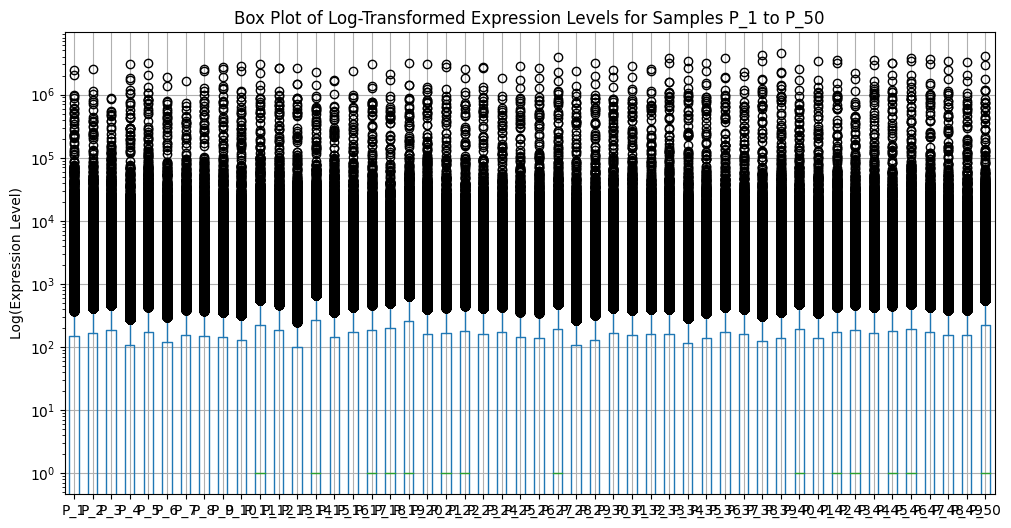

In [39]:
import matplotlib.pyplot as plt

# Print all column names to verify their existence
print(df.columns)

# Check if the expected columns are in the DataFrame
expected_columns = [f'P_{i}' for i in range(1, 51)]
missing_columns = [col for col in expected_columns if col not in df.columns]

if not missing_columns:
    # Boxplot to view outliers and overall distribution of the first 50 samples
    plt.figure(figsize=(12, 6))
    df.loc[:, 'P_1':'P_50'].boxplot()
    plt.yscale('log')
    plt.title('Box Plot of Log-Transformed Expression Levels for Samples P_1 to P_50')
    plt.ylabel('Log(Expression Level)')
    plt.show()
else:
    print("The following expected columns are missing:", missing_columns)



This plot illustrates the distribution of log transformed expression level for samples p1 to p50. This graph helps us to understand the overall expression landscape and identifying samples with unusual expression patterns, which could be critical for subsequent analyses focusing on specific gene behaviors or experimental conditions.


### PCA (Principal Component Analysis)

In [43]:
# Load your combined dataset
df = pd.read_csv("Summer_Project/combined_transplant_data_final.csv")
print(df.isnull().sum())
print(df.head())


Gene_ID          0
P_1              0
P_2              0
P_3              0
P_4              0
             ...  
P_134        42115
P_135        42115
P_136        42115
Gene_Name        0
Condition        0
Length: 139, dtype: int64
           Gene_ID  P_1  P_2  P_3  P_4  P_5  P_6  P_7  P_8  P_9  ...  P_129  \
0  ENSG00000223972    0    0    0    0    0    0    0    0    0  ...    0.0   
1  ENSG00000227232    0    0    0    0    0    0    0    0    1  ...    3.0   
2  ENSG00000278267    2    1    1    3    0    1    0    0    0  ...    3.0   
3  ENSG00000243485    0    0    0    0    0    0    0    0    0  ...    0.0   
4  ENSG00000284332    0    0    0    0    0    0    0    0    0  ...    0.0   

   P_130  P_131  P_132  P_133  P_134  P_135  P_136    Gene_Name  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0      DDX11L1   
1   16.0    8.0    1.0    5.0    1.0    6.0    4.0       WASH7P   
2    4.0    4.0    0.0    1.0    1.0    2.0    2.0    MIR6859-1   
3    0.0    0.0    0.0

#### This step is to make sure our dataset doesn't contain any missing values (NaNs). This is important because PCA cannot be computed directly on data that includes NaNs.
***Imputation:*** Replace missing values with a substitute value. Common choices are the mean, median, or mode of the column.

   P_1  P_2  P_3  P_4  P_5  P_6  P_7  P_8  P_9  P_10  ...  P_127  P_128  \
0    0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
1    0    0    0    0    0    0    0    0    1     0  ...    0.0    2.0   
2    2    1    1    3    0    1    0    0    0     0  ...    0.0    2.0   
3    0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
4    0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   

   P_129  P_130  P_131  P_132  P_133  P_134  P_135  P_136  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    3.0   16.0    8.0    1.0    5.0    1.0    6.0    4.0  
2    3.0    4.0    4.0    0.0    1.0    1.0    2.0    2.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 136 columns]


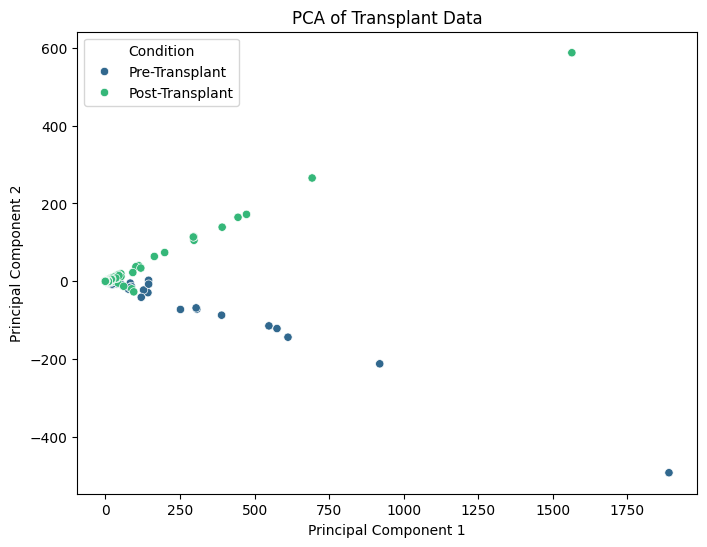

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame
df = pd.read_csv("Summer_Project/combined_transplant_data_final.csv")

# Remove non-numeric columns
df_numeric = df.drop(columns=['Gene_ID', 'Gene_Name', 'Condition'])
print(df_numeric.head())

# Handling missing values, assuming you want to fill with zero
df_numeric = df_numeric.fillna(0)

# Scaling the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# PCA
pca = PCA(n_components=2) 
principal_components = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add back the condition for visualization
pca_df['Condition'] = df['Condition']

# Plotting the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Condition', data=pca_df, palette='viridis')
plt.title('PCA of Transplant Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


This graph shows a PCA (Principal Component Analysis) which helps us see patterns in the gene expression data before and after a transplant. The horizontal axis, called Principal Component 1, shows the most significant differences in gene expression. It helps us see that the samples taken before the transplant (shown in green) are different from those taken after the transplant (shown in blue).

The vertical axis, called Principal Component 2, also shows differences but they are less significant compared to the horizontal axis. This axis helps us see variations within the pre-transplant and post-transplant groups.

In simple terms, this graph helps us see that the gene expression changes significantly due to the transplant and these changes can be grouped into before and after the transplant. This is useful for understanding how transplants affect the body at a molecular level and might help doctors monitor or improve transplant outcomes.

### Clustering

Clustering is a powerful statistical method used to explore data by grouping similar items together.

This method helps us identify which samples have similar patterns, suggesting they might be undergoing similar biological processes. By doing this, we can better understand how a transplant impacts different groups of genes across various samples. Clustering thus serves as a vital tool in our analysis, enabling us to uncover hidden patterns and relationships that aren't immediately obvious

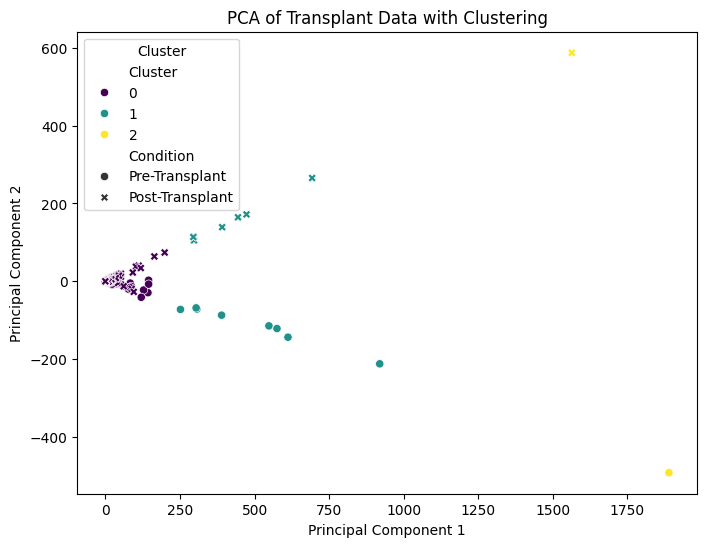

In [32]:
from sklearn.cluster import KMeans

# Assuming you want to explore a few clusters
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

# Plotting PCA with clusters highlighted
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', style='Condition')
plt.title('PCA of Transplant Data with Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


After running the clustering on our transplant data, we found several distinct groups. Each group, or 'cluster', contains samples that show similar patterns in gene expression. By analyzing these clusters, we can start to understand how the transplant affects different groups of genes. This helps us to pinpoint the changes in biological processes due to the transplant

### Checking out datasets for further analysis

In this step we filled missing data to prepare our dataset for analysis. Many analysis methods can't handle missing data and may produce inaccurate results or fail to run so we used the median of each column to fill in the missing values. The median is less affected by outliers and provides a representative value that doesn't distort the data's original distributio

In [44]:
# Impute missing values using the median for each column
for column in ['P_134', 'P_135', 'P_136']:
    median_value = df[column].median()  # Calculate median where it is not NaN
    df[column] = df[column].fillna(median_value)  # Fill NaNs with the median value

# Confirm that the imputation was successful
print(df[['P_134', 'P_135', 'P_136']].isnull().sum())


P_134    0
P_135    0
P_136    0
dtype: int64


Output shows that there is no missing values in the columns P_134, 135, 136.

Now our dataset is clean and contains no missing values, we can proceed to more advanced analysis such as Differential Expression Analysis (DEA). This will help identify genes whose expression levels significantly differ between conditions (e.g., Pre-Transplant vs. Post-Transplant). Here's how you can proceed:

### Differential Expression Analysis

In [45]:
df.head

<bound method NDFrame.head of                Gene_ID   P_1   P_2   P_3   P_4   P_5   P_6   P_7   P_8   P_9  \
0      ENSG00000223972     0     0     0     0     0     0     0     0     0   
1      ENSG00000227232     0     0     0     0     0     0     0     0     1   
2      ENSG00000278267     2     1     1     3     0     1     0     0     0   
3      ENSG00000243485     0     0     0     0     0     0     0     0     0   
4      ENSG00000284332     0     0     0     0     0     0     0     0     0   
...                ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
84225  ENSG00000202239     0     0     0     0     0     0     0     0     0   
84226  ENSG00000160307    43    12    43    44    17     0    54     5     6   
84227  ENSG00000160310  1931  1440  1768  1283  1994  1250  1441  1240  1409   
84228  ENSG00000230982     0     0     0     0     0     0     0     0     0   
84229  ENSG00000212932     0     0     0     0     0     0     0     0     0   

       ..

  Gene_ID   P_Value  Adjusted_P_Value
0     P_1  0.008229          1.143780
1     P_2  0.066945          9.305388
2     P_3  0.163655         22.748060
3     P_4  0.375977         52.260862
4     P_5  0.003575          0.496954


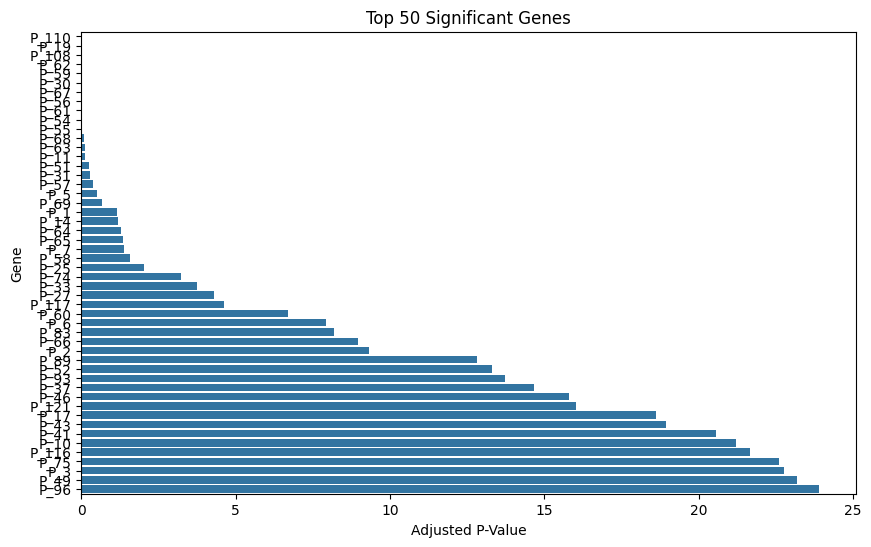

In [46]:
import scipy.stats as stats
import pandas as pd

# Load your DataFrame
df = pd.read_csv('/Users/aruna/Documents/Summer_Project/combined_transplant_data_final.csv')  # Modify with your actual file path

# Ensure the conditions are correctly specified
conditions = df['Condition'].unique()
group1 = df[df['Condition'] == conditions[0]]
group2 = df[df['Condition'] == conditions[1]]

# List to store results
genes = []
p_values = []
adjusted_p_values = []

# Iterate over each gene to perform t-tests
for gene in df.drop(['Gene_ID', 'Gene_Name', 'Condition'], axis=1).columns:
    # Ensure there is enough data to perform a t-test
    if len(group1[gene].dropna()) > 1 and len(group2[gene].dropna()) > 1:
        t_stat, p_val = stats.ttest_ind(group1[gene].dropna(), group2[gene].dropna(), equal_var=False)
        genes.append(gene)
        p_values.append(p_val)
        adjusted_p_values.append(p_val * len(df.columns))  # Bonferroni correction
    else:
        genes.append(gene)
        p_values.append(None)  # Use None for genes that cannot be tested
        adjusted_p_values.append(None)

# Create DataFrame
p_values_df = pd.DataFrame({
    'Gene_ID': genes,
    'P_Value': p_values,
    'Adjusted_P_Value': adjusted_p_values
})

# Print and save results
print(p_values_df.head())
p_values_df.to_csv('differential_expression_results.csv', index=False)

# Optionally, visualize the significant genes
import seaborn as sns
import matplotlib.pyplot as plt

significant_genes = p_values_df.dropna().sort_values('Adjusted_P_Value').head(50)
plt.figure(figsize=(10, 6))
sns.barplot(x='Adjusted_P_Value', y='Gene_ID', data=significant_genes)
plt.title('Top 50 Significant Genes')
plt.xlabel('Adjusted P-Value')
plt.ylabel('Gene')
plt.show()


### Loading  Differential Expression Results

In [ ]:
import pandas as pd

# Load the differential expression results
df = pd.read_csv('differential_expression_results.csv')

# Display the first few rows of the dataframe to check its structure
print(df.head())
